In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
!pip install astroML

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.3/134.3 kB 4.8 MB/s eta 0:00:00


In [5]:
from astroML.datasets import fetch_rrlyrae_mags

data = fetch_rrlyrae_mags()
# number of objects in dataset

In [6]:
data = data.byteswap().newbyteorder()

df = pd.DataFrame(data)
display(df)

,__SIG2010_,Type,Per,uAmp,T0_u,gAmp,T0_g,rAmp,T0_r,iAmp,...,RAJ2000,DEJ2000,Ar,Dist,umag,gmag,rmag,imag,zmag,Vmag
0,4099,b'ab',0.641754,0.534608,51075.274714,0.563839,51075.288902,0.398326,51075.295112,0.317851,...,0.935679,1.115859,0.089,17.750000,18.134001,16.989000,16.777000,16.702999,16.684999,16.846001
1,13350,b'ab',0.547987,1.029445,54025.330112,1.093322,54025.326856,0.801720,54025.326474,0.642111,...,0.283437,1.178522,0.080,24.770000,18.839001,17.679001,17.544001,17.497000,17.500999,17.570000
2,15927,b'ab',0.612263,0.651579,53680.222485,0.697439,53680.229439,0.486554,53680.226214,0.368674,...,3.254658,-0.584066,0.090,29.120001,19.288000,18.058001,17.858999,17.792000,17.780001,17.921000
3,20406,b'ab',0.631853,0.553247,54000.280528,0.586784,54000.292109,0.426846,54000.276631,0.342734,...,3.244369,0.218891,0.088,9.130000,16.715000,15.543000,15.336000,15.286000,15.276000,15.403000
4,21992,b'ab',0.625880,1.109322,53698.245218,1.139930,53698.245256,0.849551,53698.243534,0.661144,...,4.315354,1.054582,0.077,7.350000,16.186001,15.040000,14.909000,14.864000,14.853000,14.932000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
478,4956681,b'ab',0.499544,1.079098,53272.486302,1.304108,53272.501031,0.971932,53272.495204,0.730201,...,58.700931,1.228830,1.051,36.880001,19.476000,18.513000,18.454000,18.480000,18.504999,18.434000
479,4983075,b'ab',0.646700,0.443980,54064.376360,0.487079,54064.399463,0.339135,54064.415166,0.278196,...,57.156605,0.134676,0.527,29.150000,19.114000,18.054001,17.868999,17.818001,17.841999,17.923000
480,4984662,b'ab',0.636863,0.565909,53994.452735,0.599289,53994.470683,0.464574,53994.472022,0.359037,...,57.128875,-0.389138,0.584,39.049999,19.745001,18.701000,18.489000,18.454000,18.452000,18.558001
481,4992418,b'ab',0.580371,0.930774,53681.401696,0.984270,53681.408671,0.722729,53681.416038,0.560006,...,57.151443,0.892965,0.479,31.459999,19.278999,18.214001,18.042000,18.000000,17.997000,18.089001


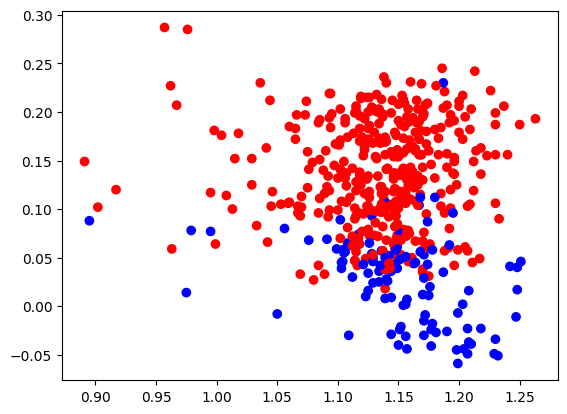

In [7]:
df['u-g'] = df['umag'] - df['gmag']
df['g-r'] = df['gmag'] - df['rmag']
df['r-i'] = df['rmag'] - df['imag']
df['i-z'] = df['imag'] - df['zmag']

plt.scatter(df['u-g'], df['g-r'], c=np.where(df['Type'] == b'ab', 'r', 'b'))

Algorithm 3.1 The first algorithm that computes a (1 + ϵ)-approximation to MEB(A).

In [8]:
def phi(u, A):
    return sum(u[i] * np.dot(A[i].T, A[i]) for i in range(len(u))) - np.dot(sum(u[i] * A[i] for i in range(len(u))).T, sum(u[i] * A[i] for i in range(len(u))))

def create_unit_vector(idx, length):
    vec = np.zeros(length)
    vec[idx] = 1
    return vec

In [9]:
import numpy as np
import pandas as pd

A = df[df['Type'] == b'ab'][['u-g', 'g-r']].values

epsilon = 0

def frank_wolfe_alg_MEB(A):

    # Compute distances and indices
    distances_to_a_1 = np.linalg.norm(A - A[0], axis=1)**2 # ||a_i - a_1||^2
    alpha = np.argmax(distances_to_a_1)
    distances_to_a_alpha = np.linalg.norm(A - A[alpha], axis=1)**2 if alpha is not None else np.zeros(len(A)) # ||a_i - a_α||^2
    beta = np.argmax(distances_to_a_alpha)

    # Initialize u, chi, c
    u = np.zeros(len(A))
    u[alpha], u[beta] = 0.5, 0.5

    chi = [A[alpha], A[beta]]
    c = u @ A
    c_hist = [c]
    mu = phi(u, A)

    # Main iteration loop
    distances_to_c = np.linalg.norm(A - c, axis=1)**2
    kappa = np.argmax(distances_to_c)
    delta = (distances_to_c[kappa] / mu) - 1.0

    k = 0
    while delta > ((1 + epsilon)**2) - 1.0 and k < 1000:
        lambd = delta / (2 * (1.0 + delta))
        k += 1
        u = (1 - lambd) * u + lambd * create_unit_vector(kappa, len(A))
        c = (1 - lambd) * c + lambd * A[kappa]
        c_hist.append(c)
        chi.append(A[kappa])
        mu = phi(u, A)
        distances_to_c = np.linalg.norm(A - c, axis=1)**2
        kappa = np.argmax(distances_to_c)
        delta = (distances_to_c[kappa] / mu) - 1

    print("Center:", c)
    print("Radius:", np.sqrt((1 + delta) * mu))
    print("Iterations:", k)

    return c, np.sqrt((1 + delta) * mu), k


Center: [1.07753704 0.16668496]
Radius: 0.18737290666941106
Iterations: 1000


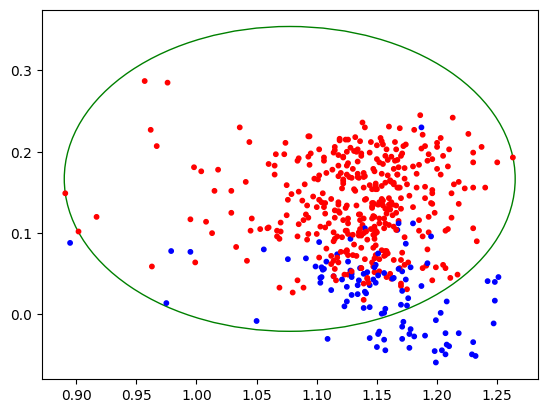

In [10]:
c, r, k = frank_wolfe_alg_MEB(A)

circle = plt.Circle(tuple(c), r, color='g', fill=False)

ax = plt.gca()
ax.cla()

ax.add_patch(circle)

plt.scatter(df['u-g'], df['g-r'], c=np.where(df['Type'] == b'ab', 'r', 'b'), s=10)

In [12]:
from astroML.datasets import fetch_sdss_galaxy_colors

data = fetch_sdss_galaxy_colors()

data = data.byteswap().newbyteorder()

df = pd.DataFrame(data)
display(df)

querying for 50000 objects
SELECT TOP 50000
  p.u, p.g, p.r, p.i, p.z, s.class, s.z, s.zerr
FROM PhotoObj AS p
  JOIN SpecObj AS s ON s.bestobjid = p.objid
WHERE 
  p.u BETWEEN 0 AND 19.6
  AND p.g BETWEEN 0 AND 20
  AND s.class <> 'UNKNOWN'
  AND s.class <> 'STAR'
  AND s.class <> 'SKY'
  AND s.class <> 'STAR_LATE'


HTTPError: HTTP Error 404: Not Found

# Pulsar Dataset

In [10]:
# open the pulsar dataset
pulsar_df = pd.read_csv('/content/drive/MyDrive/O4DS Project/Code-Optimization/datasets/pulsar_data_train.csv')

pulsar_df = pulsar_df.dropna()
space_columns = pulsar_df.columns[:-1]  # Exclude the last column

# display the first 5 rows
display(pulsar_df.head())

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,121.156250,48.372971,0.375485,-0.013165,3.168896,18.399367,7.449874,65.159298,0.0
1,76.968750,36.175557,0.712898,3.388719,2.399666,17.570997,9.414652,102.722975,0.0
2,130.585938,53.229534,0.133408,-0.297242,2.743311,22.362553,8.508364,74.031324,0.0
4,84.804688,36.117659,0.825013,3.274125,2.790134,20.618009,8.405008,76.291128,0.0
7,109.406250,55.912521,0.565106,0.056247,2.797659,19.496527,9.443282,97.374578,0.0


In [11]:
pulsar_df[pulsar_df['target_class'] == 1.0].shape

(850, 9)

In [12]:
pulsar_df_0 = pulsar_df[pulsar_df['target_class'] == 0.0]


c_pulsar, r_pulsar, k_pulsar = frank_wolfe_alg_MEB(pulsar_df_0[space_columns] .values)

Center: [ 1.20654428e+02  5.46945390e+01 -1.47004837e-01  1.62046118e+00
  8.46684975e+01  4.34077465e+01  1.68202223e+01  5.92939517e+02]
Radius: 605.8142091726876
Iterations: 1000


In [13]:
# Select columns representing the 9-dimensional space
space_columns = pulsar_df.columns[:-1]  # Exclude the last column

# Calculate the Euclidean distance from each point to the center
distances = np.linalg.norm(pulsar_df[space_columns] - c_pulsar, axis=1)

# Add a new boolean column indicating whether the point is inside the ball
pulsar_df['InsideBall'] = distances < r_pulsar

In [14]:
print(pulsar_df[pulsar_df['target_class'] == 1.0]['InsideBall'].sum())

779
